Data Source : [Link Data Source](https://www.kaggle.com/datasets/indraputra21/used-car-listings-in-indonesia?select=used_car.csv)

Dashboard : [Link Dashboard](https://public.tableau.com/shared/R3HDDD3Z5?:display_count=n&:origin=viz_share_link)

# I. Perkenalan

**Milestone 2**

Nama    : Rakhmat Safri Agung Pratama

Batch   : CODA-RMT-005

Notebook ini berisikan analisis mobil bekas di Indonesia

# II. Identifikasi Masalah

* **Topik Permasalahan:**

    Analisis Faktor yang Mempengaruhi Harga Mobil Bekas di Indonesia

* **Problem Statement (SMART):**

    Mengetahui faktor yang mempengaruhi harga penjualan, sehingga dapat menetapkan harga yang kompetitif dan penjualan yang cepat dalam 6 bulan.

* **Latar Belakang:**

    Sebagai penjual mobil bekas, pasar mobil bekas masih eksis di era saat ini. Banyak faktor yang mempengaruhi harga jual kendaraan. Konsumen dan dealer sering mengalami kesulitan dalam menentukan harga yang kompetitif untuk meningkatkan daya saing dan mempercepat proses penjualan. Harga yang terlalu tinggi dapat mengurangi minat pembeli, jika harga terlalu rendah dapat mengurangi keuntungan penjual.

* **Penjabaran Masalah:**

    1. Brand mobil apakah yang mendominasi di pasaran?
    2. Lokasi manakah yang memiliki stock mobil paling banyak?
    3. Bagaimana trend tahun mobil yang dijual?
    4. Bagaimana rata rata harga mobil berdasarkan tahun mobil?
    5. Bagaimana persebaran harga mobil bekas?
    6. Apakah ada perbedaan harga mobil berdasarkan tipe transmisi?
    7. Faktor apakah yang mempengaruhi penentuan harga jual?

# III. Data Loading

* **Import Library**

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

code di atas digunakan untuk mengimport library yang akan digunakan pada project ini.

* **Data Load**

In [3]:
df = pd.read_csv("T:/CODA/Tugas/Ph 1/Week 3/p1-coda005-rmt-m2-rakhmatsapp/used_car.csv")

code di atas digunakan untuk meloading data csv ke dataframe.

* **Eksplorasi Data Sederhana**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   car name                   609 non-null    object 
 1   brand                      609 non-null    object 
 2   year                       609 non-null    int64  
 3   mileage (km)               609 non-null    float64
 4   location                   609 non-null    object 
 5   transmission               609 non-null    object 
 6   plate type                 609 non-null    object 
 7   rear camera                609 non-null    int64  
 8   sun roof                   609 non-null    int64  
 9   auto retract mirror        609 non-null    int64  
 10  electric parking brake     609 non-null    int64  
 11  map navigator              609 non-null    int64  
 12  vehicle stability control  609 non-null    int64  
 13  keyless push start         609 non-null    int64  

code di atas digunakan untuk mengetahui informasi dataframe yang digunakan. dari informasi di atas didapati bahwa:
    
    - Terdapat 609 baris data dan 20 kolom.
    - terdapat satu kolom bertipe data float, 14 kolom bertipe data integer, 5 kolom bertipe data object.

In [7]:
df.head()

,car name,brand,year,mileage (km),location,transmission,plate type,rear camera,sun roof,auto retract mirror,electric parking brake,map navigator,vehicle stability control,keyless push start,sports mode,360 camera view,power sliding door,auto cruise control,price (Rp),instalment (Rp|Monthly)
0,AYLA X 1.2,Daihatsu,2018,10.508,Jakarta Utara,Manual,even plate,0,0,0,0,0,0,0,0,0,0,0,101000000,2060000
1,AGYA TRD SPORTIVO 1.0,Toyota,2015,112.888,Bogor,Manual,even plate,0,0,0,0,0,0,0,0,0,0,0,82000000,1670000
2,X-TRAIL 2.5,Nissan,2015,118.429,Surabaya,Automatic,odd plate,0,0,0,0,0,0,1,0,1,0,0,169000000,3440000
3,YARIS S TRD 1.5,Toyota,2020,15.945,Tangerang Selatan,Automatic,odd plate,0,0,0,0,0,0,0,0,0,0,0,218000000,4440000
4,AGYA G 1.2,Toyota,2019,30.404,Jakarta Barat,Manual,odd plate,0,0,0,0,0,0,0,0,0,0,0,117000000,2380000


Code di atas digunakan untuk mengetahui kondisi data frame yang digunakan.

# IV. Data Cleaning

* **Cek Missing Value**

In [8]:
missing_count = df.isnull().sum()
percent_missing = missing_count/len(df)
missing_value_df = pd.DataFrame({'count_missing': missing_count, 'percent_missing': percent_missing})
missing_value_df

,count_missing,percent_missing
car name,0,0.0
brand,0,0.0
year,0,0.0
mileage (km),0,0.0
location,0,0.0
transmission,0,0.0
plate type,0,0.0
rear camera,0,0.0
sun roof,0,0.0
auto retract mirror,0,0.0


Code di atas digunakan untuk mengecek missing value. dari hasil code didapati bahwa tidak ada data yang missing value.

* **Cek Duplikat Data**

In [4]:
df.duplicated().sum()

np.int64(0)

Dari hasil code di atas didapati bahwa tidak ada data yang duplikat.

# V. Analisis dan Perhitungan

**1. Brand mobil apakah yang mendominasi di pasaran?**

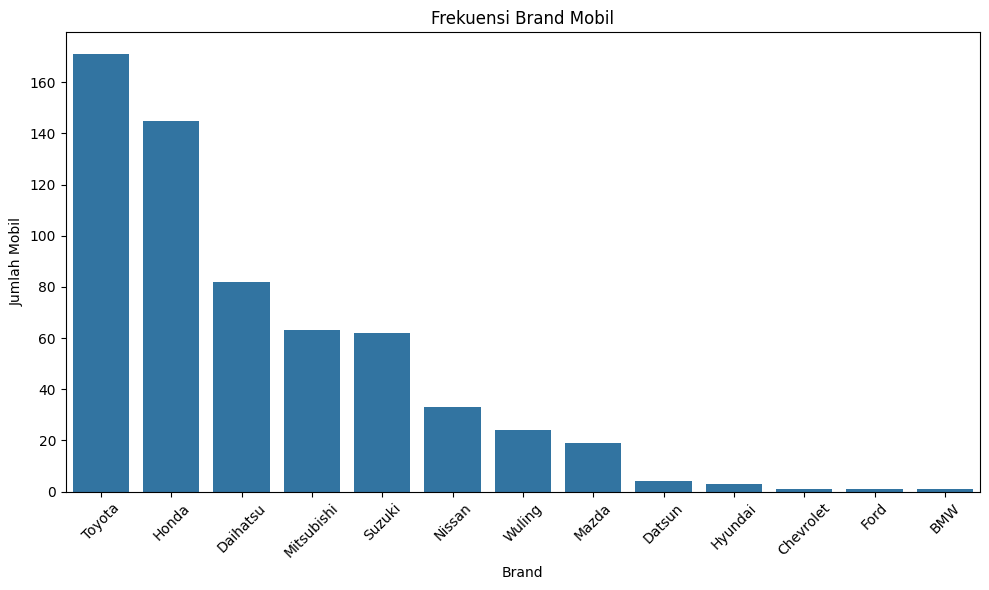

In [11]:
plt.figure(figsize=(10,6))
hitung_brand = df['brand'].value_counts()
sns.barplot(x=hitung_brand.index, y=hitung_brand.values)
plt.title('Frekuensi Brand Mobil')
plt.xlabel('Brand')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari hasil code di atas didapati bahwa pasar mobil bekas didominasi oleh brand Toyota, disusul dengan brand Honda pada posisi kedua, dan Daihatsu terpaut 50% unit lebih dari Honda

**2. Lokasi manakah yang memiliki stock mobil paling banyak?**

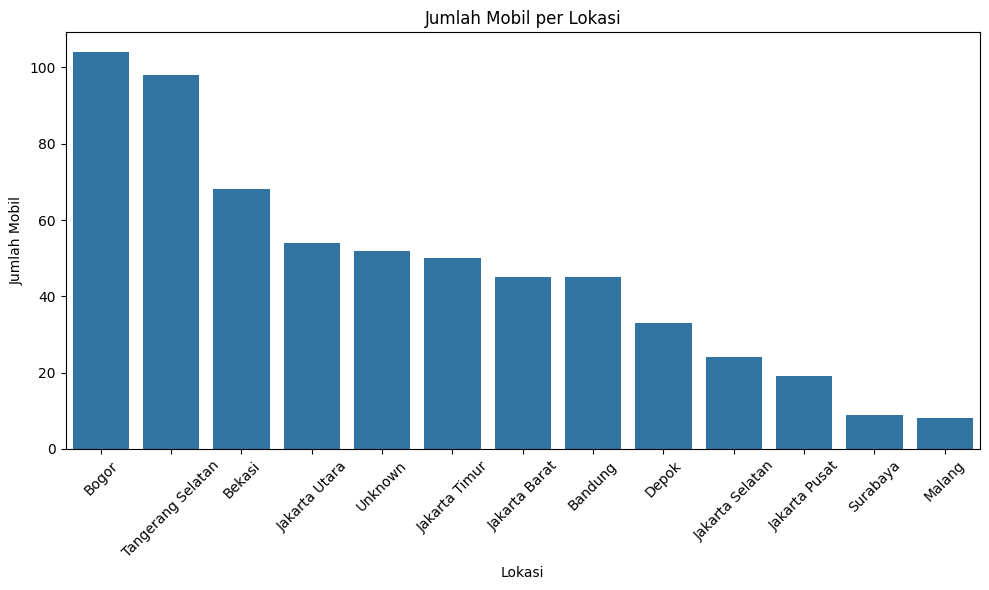

In [12]:
plt.figure(figsize=(10,6))
hitung_lokasi = df['location'].value_counts()
sns.barplot(x=hitung_lokasi.index, y=hitung_lokasi.values)
plt.title('Jumlah Mobil per Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari code di atas didapati bahwa stock terbanyak terdapat pada Kota Bogor, disusul Kota Tangerang Selatan.

**3. Bagaimana trend tahun mobil yang dijual?**

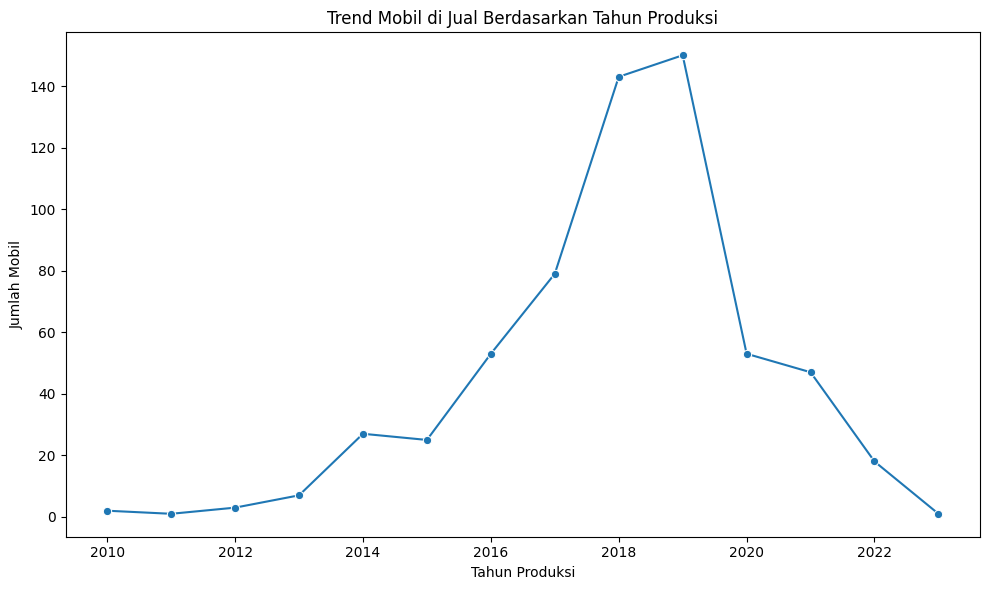

In [27]:
plt.figure(figsize=(10,6))
hitung_tahun = df['year'].value_counts().sort_index()
sns.lineplot(x=hitung_tahun.index, y=hitung_tahun.values, marker="o")
plt.title('Trend Mobil di Jual Berdasarkan Tahun Produksi')
plt.xlabel('Tahun Produksi')
plt.ylabel('Jumlah Mobil')
plt.tight_layout()
plt.show()

dari hasil code di atas didapati bahwa mobil produksi tahun 2019 dan 2018 paling banyak dijual. 

**4. Bagaimana rata rata harga mobil berdasarkan tahun mobil?**

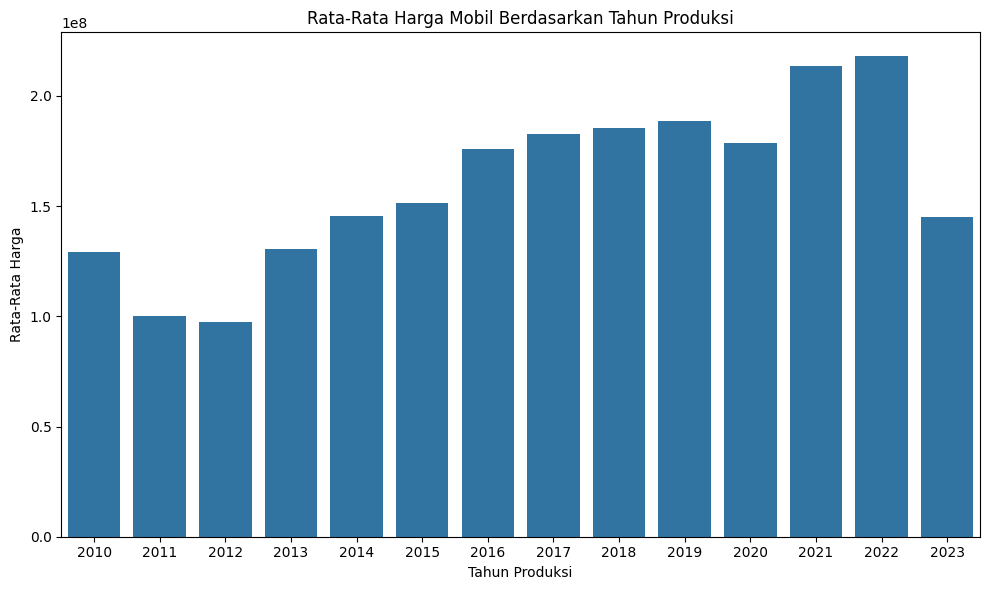

In [21]:
plt.figure(figsize=(10,6))
rata_harga = df.groupby('year')['price (Rp)'].mean().sort_index()
sns.barplot(x=rata_harga.index, y=rata_harga)
plt.title('Rata-Rata Harga Mobil Berdasarkan Tahun Produksi')
plt.xlabel('Tahun Produksi')
plt.ylabel('Rata-Rata Harga')
plt.tight_layout()
plt.show()

dari code di atas di dapati hasil bahwa semakin tinggi tahun produksi mobil maka terdapat kenaikan rata-rata harga yang cukup konsisten. Dan puncak rata-rata harga tertinggi berada pada produksi tahun 2022. didapati penurunan harga rata-rata dari tahun 2019 ke 2020 disebabkan oleh pandemi yang membuat pasar menjadi lesu.

**5. Bagaimana persebaran harga mobil bekas?**

In [28]:
print(f"mean : {df['price (Rp)'].mean()}")
print(f"median : {df['price (Rp)'].median()}")
print(f"std : {df['price (Rp)'].std()}")

mean : 182977832.51231527
median : 177000000.0
std : 66882598.56903664


In [29]:
print(f"Skewness: {df['price (Rp)'].skew()}")

Skewness: 1.4515782541220976


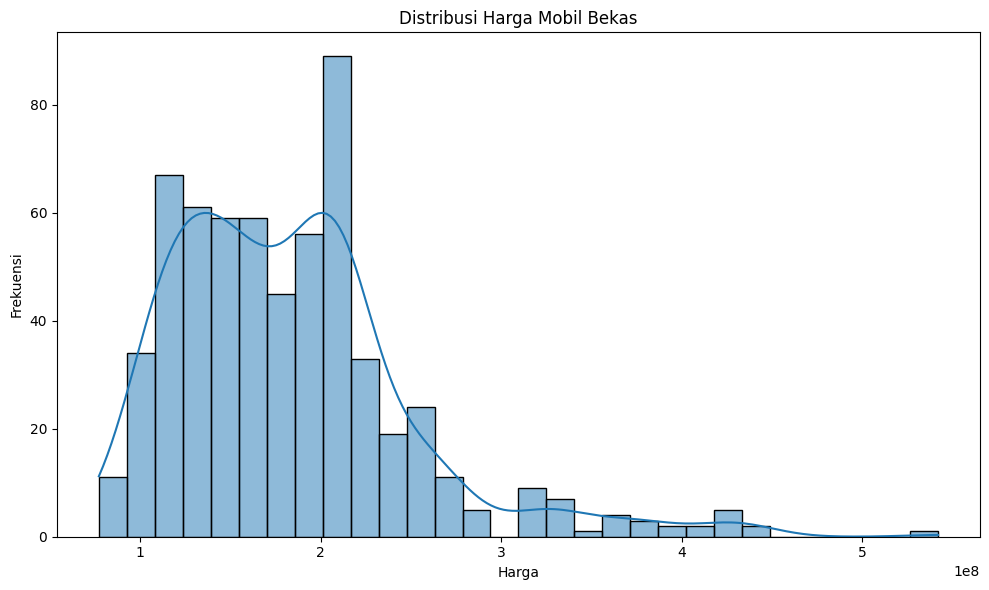

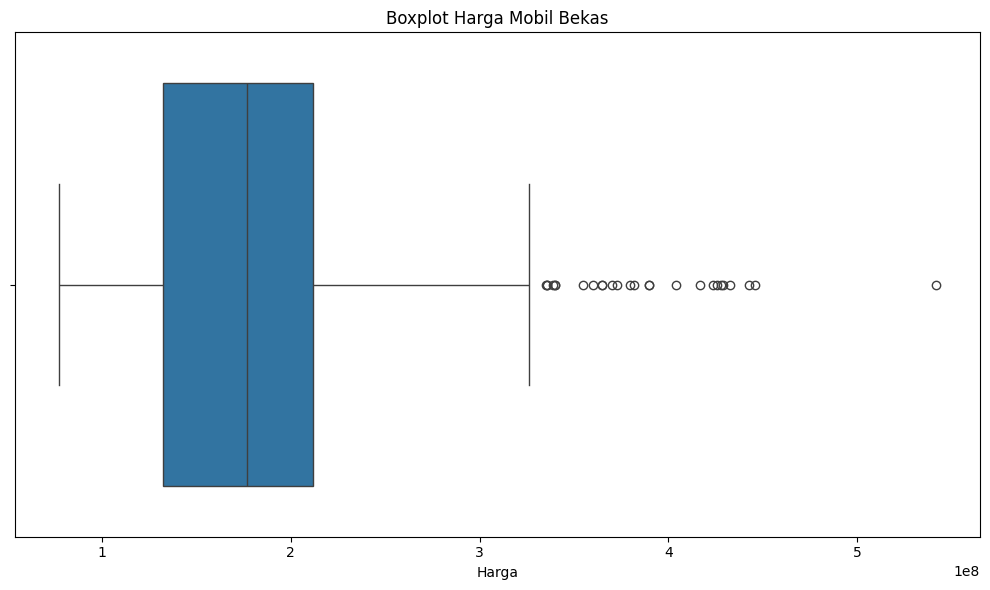

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['price (Rp)'], kde=True, bins=30)
plt.title('Distribusi Harga Mobil Bekas')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=df['price (Rp)'])
plt.title('Boxplot Harga Mobil Bekas')
plt.xlabel('Harga')
plt.tight_layout()
plt.show()

Dari hasil code dan hasil visualisasi di atas didapati bahwa harga terdistribusi ke kanan dan menunjukkan banyak mobil dengan harga dibawah rata-rata (harga menengah), sebagian kecil mobil memiliki harga yang tinggi. dan terdepat outlier 

**6. Apakah ada perbedaan harga mobil berdasarkan tipe transmisi?**

* **H0:** Terdapat perbedaan harga berdasarkan tipe transmisi
* **H1:** Tidak terdapat perbedaan harga berdasarkan tipe transmisi

In [ ]:
manual = df[df['transmission'] == 'Manual']['price (Rp)']
matic = df[df['transmission'] == 'Automatic']['price (Rp)']

t_stat, p_val = stats.ttest_ind(manual, matic)
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: -11.879643117677757
P-value: 2.069099397614442e-29


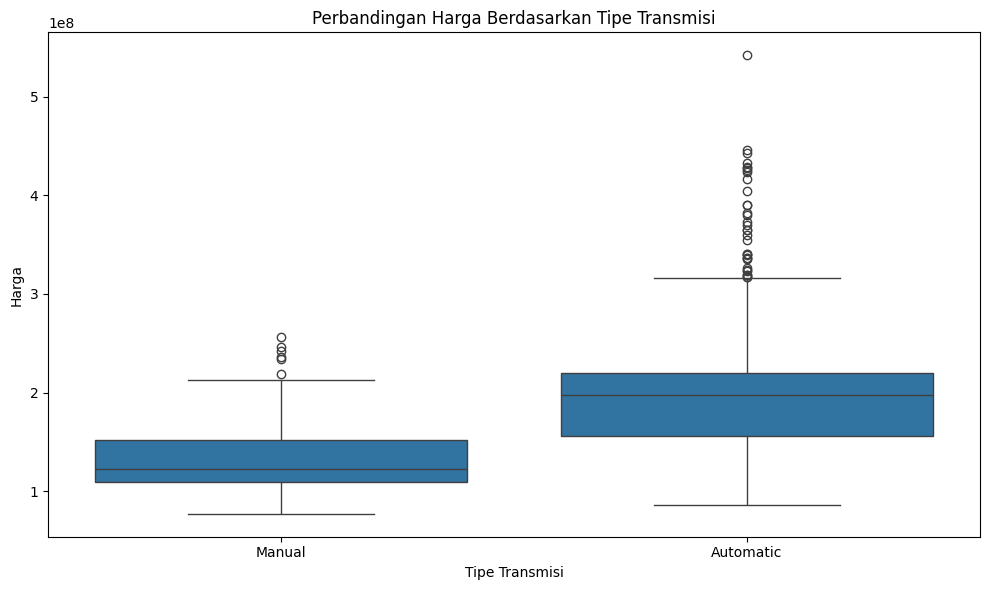

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission', y='price (Rp)', data=df)
plt.title('Perbandingan Harga Berdasarkan Tipe Transmisi')
plt.xlabel('Tipe Transmisi')
plt.ylabel('Harga')
plt.tight_layout()
plt.show()

dari code dan hasil visualisasi di atas didapati hasil bahwa P-value > 0,05 menandakan kita menolak H0 dan menerima H1. Juga mendapati bahwa harga mobil transmisi otomatis lebih tinggi daripada mobil manual.

**7. Faktor apakah yang mempengaruhi penentuan harga jual?**

In [5]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,mileage (km),rear camera,sun roof,auto retract mirror,electric parking brake,map navigator,vehicle stability control,keyless push start,sports mode,360 camera view,power sliding door,auto cruise control,price (Rp),instalment (Rp|Monthly)
year,1.000000,-0.586210,-0.016859,0.038789,0.186434,0.042215,-0.076206,0.100758,0.037998,0.025264,0.009604,-0.070079,0.061821,0.230540,0.230428
mileage (km),-0.586210,1.000000,0.063364,-0.024056,-0.048278,0.001806,0.074162,0.017244,-0.013437,-0.031109,0.037620,0.040981,-0.004674,-0.077146,-0.077058
rear camera,-0.016859,0.063364,1.000000,-0.043540,-0.055071,-0.046270,0.054298,-0.138675,-0.061313,0.079311,-0.052749,0.027778,-0.067059,0.038510,0.038381
sun roof,0.038789,-0.024056,-0.043540,1.000000,0.030049,0.135986,-0.017408,-0.059281,-0.020330,-0.070289,0.053742,-0.021374,-0.028667,0.247568,0.247549
auto retract mirror,0.186434,-0.048278,-0.055071,0.030049,1.000000,0.020385,-0.027240,0.296166,0.215747,-0.151128,0.007865,0.048355,0.133421,0.426771,0.426754
electric parking brake,0.042215,0.001806,-0.046270,0.135986,0.020385,1.000000,-0.017901,-0.060957,0.010475,-0.072276,0.051133,-0.021978,0.029574,0.201175,0.201214
map navigator,-0.076206,0.074162,0.054298,-0.017408,-0.027240,-0.017901,1.000000,-0.033884,-0.031115,0.007799,0.117930,-0.012217,-0.016385,0.089841,0.089854
vehicle stability control,0.100758,0.017244,-0.138675,-0.059281,0.296166,-0.060957,-0.033884,1.000000,-0.068021,-0.121251,-0.043889,-0.041603,-0.055796,0.102740,0.102732
keyless push start,0.037998,-0.013437,-0.061313,-0.020330,0.215747,0.010475,-0.031115,-0.068021,1.000000,-0.125630,0.005150,-0.038203,-0.051237,0.087837,0.087769
sports mode,0.025264,-0.031109,0.079311,-0.070289,-0.151128,-0.072276,0.007799,-0.121251,-0.125630,1.000000,-0.052039,-0.010059,-0.066157,0.018852,0.018807


<Axes: >

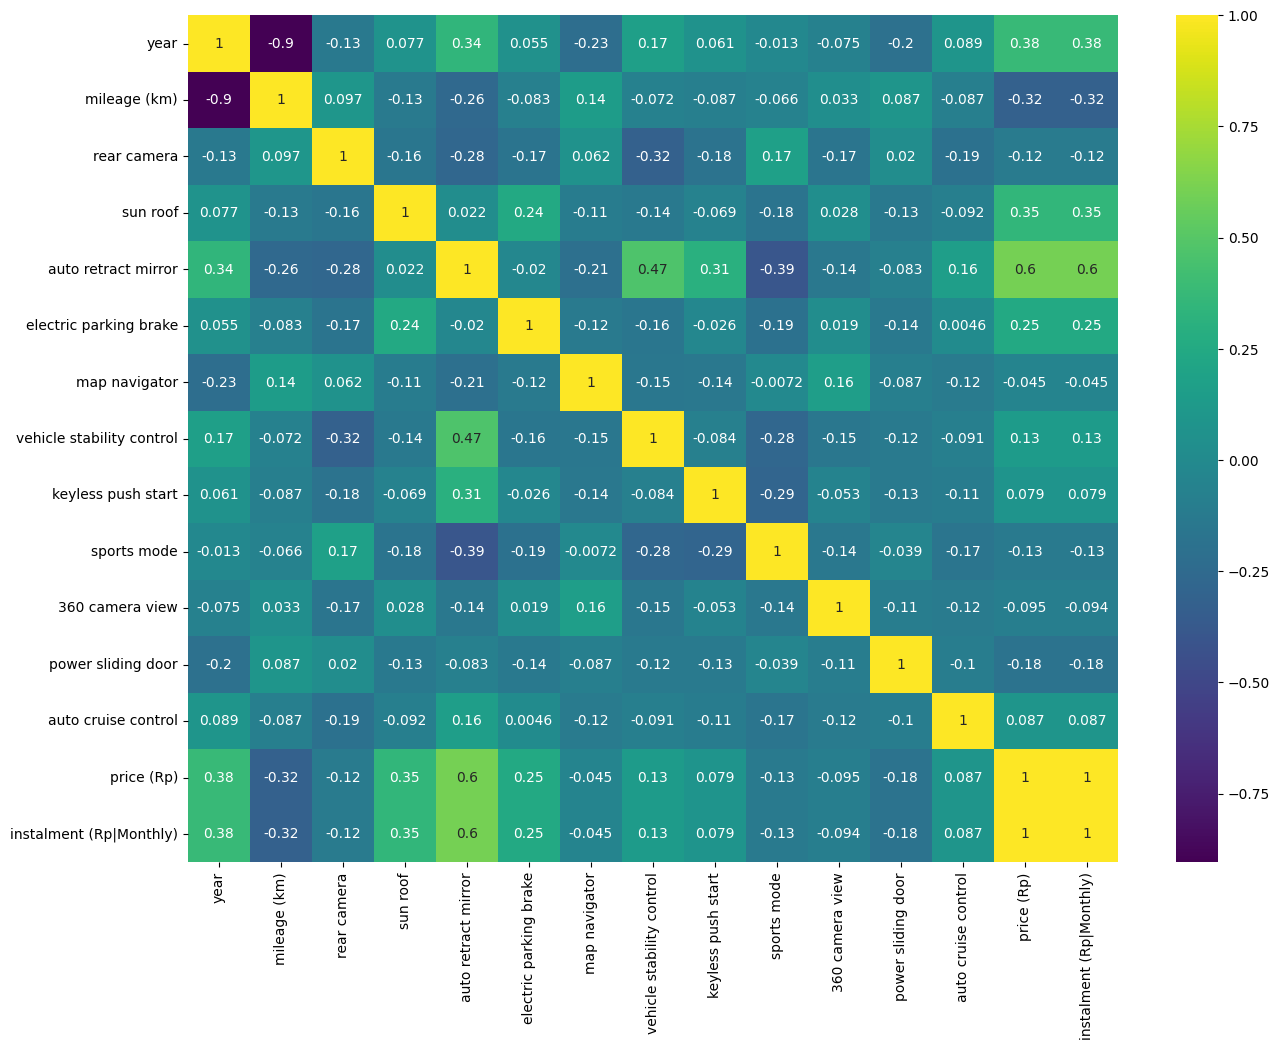

In [7]:
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix.corr(), cmap='viridis', annot=True)

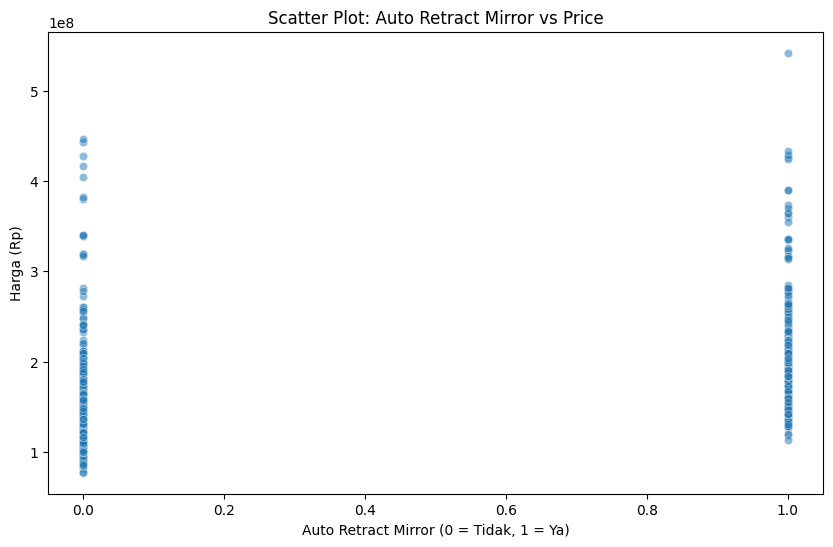

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['auto retract mirror'], y=df['price (Rp)'], alpha=0.5)
plt.title('Scatter Plot: Auto Retract Mirror vs Price')
plt.xlabel('Auto Retract Mirror (0 = Tidak, 1 = Ya)')
plt.ylabel('Harga (Rp)')
plt.show()

Dari hasil perhitungan dan visualisasi di atas didapati hasil bawha, faktor yang mempengaruhi penetapan harga jual adalah fitur mobil auto retract mirror dengan nilai tertinggi, sedangkan nilai di bawah auto retract mirror terdapat tahun mobil, dan fitur sunroof. Sedangkan mileage tidak ada korelasi terhadap penetapan harga.

# VI. Pengambilan Kesimpulan

Dari hasil analisis dapat kita ambil kesimpulan bahwa:

* Brand mobil yang paling mendominasi untuk pasar mobil bekas adalah brand Toyota, disusul Honda, Daihatsu, Mitsubishi dan Suzuki.
* Lokasi mobil dengan stok unit terbanyak ada pada Kota Bogor.
* Tahun produksi mobil 2018 - 2019 lebih banyak dijual, sementara untuk tahun baru masih minim di pasar mobil bekas.
* Mobil dengan tahun produksi yang lebih muda (2021, 2022)memiliki rata -rata harga yang lebih tinggi dibandingkan tahun produksi dibawah tahun tersebut.
* Rentang harga mobil bekas sangat luas di pasar, tetapi paling banyak adalah mobil dengan rentang harga nilai tengah Rp 177.000.000
* Transmisi bisa menjadi faktor penentu untuk menentukan harga mobil. karena transmisi juga berefek pada kenyamanan ketika menyetir mobil.
* Faktor penentu harga mobil yaitu fitur auto retract mirror, sunroof. Dan faktor lainnya tahun produksi mobil, mileage tidak ada korelasi terhadap penetapan harga mobil.